In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action = 'ignore')
warnings.filterwarnings('ignore')

In [2]:
# 한글꺠지는 것 방지
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

# Data Loading

In [3]:
demo = pd.read_csv('C:/Users/wnrrh/Desktop/태준/롯데멤버스/LPOINT_BIG_COMP_01_DEMO.csv', encoding = 'utf-8', delimiter = ',')
pdde = pd.read_csv('C:/Users/wnrrh/Desktop/태준/롯데멤버스/LPOINT_BIG_COMP_02_PDDE.csv', encoding = 'utf-8', delimiter = ',')
copu = pd.read_csv('C:/Users/wnrrh/Desktop/태준/롯데멤버스/LPOINT_BIG_COMP_03_COP_U.csv', encoding = 'utf-8', delimiter = ',')
clac = pd.read_csv('C:/Users/wnrrh/Desktop/태준/롯데멤버스/LPOINT_BIG_COMP_04_PD_CLAC.csv', encoding = 'utf-8', delimiter = ',')
br = pd.read_csv('C:/Users/wnrrh/Desktop/태준/롯데멤버스/LPOINT_BIG_COMP_05_BR.csv', encoding = 'utf-8', delimiter = ',')
lpay = pd.read_csv('C:/Users/wnrrh/Desktop/태준/롯데멤버스/LPOINT_BIG_COMP_06_LPAY.csv', encoding = 'utf-8', delimiter = ',')

In [4]:
demo.rename(columns={'cust':'고객코드', 'ma_fem_dv':'성별', 'ages':'연령대', 'zon_hlv':'거주지대분류코드'},inplace=True)
pdde.rename(columns = {'cust':'고객코드', 'rct_no':'영수증번호', 'chnl_dv':'채널구분', 'cop_c':'제휴사', 'br_c':'점포코드', 'pd_c':'상품코드', 'de_dt':'구매일자', 'de_hr':'구매시간', 'buy_am':'구매금액', 'buy_ct':'구매수량'}, inplace=True)
copu.rename(columns = {'cust':'고객코드', 'rct_no':'영수증번호', 'chnl_dv':'채널구분', 'cop_c':'제휴사', 'br_c':'점포코드', 'pd_c':'상품코드', 'de_dt':'구매일자', 'vst_dt':'제휴사 방문일자', 'de_hr':'구매시간', 'buy_am':'구매금액'}, inplace=True)
clac.rename(columns = {'pd_c':'상품코드','pd_nm':'상품 소분류명', 'clac_hlv_nm':'상품 대분류명','clac_mcls_nm':'상품 중분류명'},inplace=True)
br.rename(columns = {'br_c':'점포코드', 'cop_c':'제휴사', 'zon_hlv':'점포지역대분류코드','zon_mcls':'점포지역중분류코드'},inplace=True)
lpay.rename(columns = {'cust':'고객코드','rct_no':'영수증번호', 'cop_c':'제휴사', 'chnl_dv':'채널구분','de_dt':'구매일자', 'de_hr':'구매시간', 'buy_am':'구매금액'},inplace=True)

<AxesSubplot:>

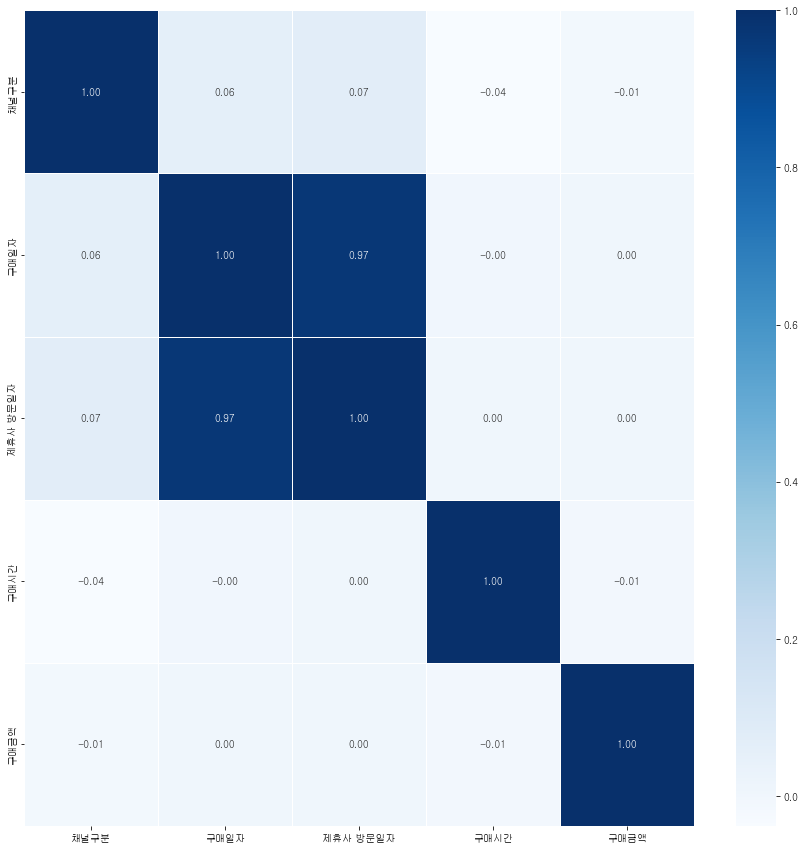

In [5]:
plt.figure(figsize=(15,15))
sns.heatmap(data = copu.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

In [6]:
pdde['타입'] = 'Product'
copu['타입'] = 'Affiliate'
lpay['타입'] = 'Lpay'
copu['구매수량'] = 0
copu['상품코드'] = np.nan
lpay['점포코드'] = np.nan
lpay['상품코드'] = np.nan
lpay['구매수량'] = 0

In [7]:
copu = copu[['고객코드','영수증번호','채널구분','제휴사','점포코드','상품코드','구매일자','구매시간','구매금액','구매수량','타입']]
lpay = lpay[['고객코드','영수증번호','채널구분','제휴사','점포코드','상품코드','구매일자','구매시간','구매금액','구매수량','타입']]

In [8]:
lpay['영수증번호'] = lpay['영수증번호'].astype('object')
lpay['점포코드'] = lpay['점포코드'].astype('object')
copu['상품코드'] = copu['상품코드'].astype('object')
lpay['상품코드'] = lpay['상품코드'].astype('object')
pdde['구매금액'] = pdde['구매금액'].astype('int')

In [9]:
df = pd.concat([pdde,copu,lpay])

In [10]:
df = pd.merge(df,demo, on = ['고객코드'], how = 'left')

In [11]:
df = pd.merge(df,br, on = ['점포코드','제휴사'], how = 'left')

In [12]:
df = pd.merge(df,clac, on = ['상품코드'], how = 'left')

In [13]:
df.isnull().sum()

고객코드              0
영수증번호             0
채널구분              0
제휴사               0
점포코드         781740
상품코드         601488
구매일자              0
구매시간              0
구매금액              0
구매수량              0
타입                0
성별                0
연령대               0
거주지대분류코드          0
점포지역대분류코드    781740
점포지역중분류코드    781740
상품 소분류명      601488
상품 대분류명      601488
상품 중분류명      601488
dtype: int64

## 결측치 왜 생겼는지 확인 

In [15]:
print(lpay.isnull().sum())
print('------------------------------')
print(copu.isnull().sum())
print('------------------------------')
print(pdde.isnull().sum())

고객코드          0
영수증번호         0
채널구분          0
제휴사           0
점포코드     353184
상품코드     353184
구매일자          0
구매시간          0
구매금액          0
구매수량          0
타입            0
dtype: int64
------------------------------
고객코드          0
영수증번호         0
채널구분          0
제휴사           0
점포코드         55
상품코드     248304
구매일자          0
구매시간          0
구매금액          0
구매수량          0
타입            0
dtype: int64
------------------------------
고객코드          0
영수증번호         0
채널구분          0
제휴사           0
점포코드     428501
상품코드          0
구매일자          0
구매시간          0
구매금액          0
구매수량          0
타입            0
dtype: int64


# 데이터프레임 분할하여 엘페이 이력 중복처리 

In [16]:
df_product = df[df['타입'] == 'Product']
df_aff = df[df['타입'] == 'Affiliate']
df_lpay = df[df['타입'] == 'Lpay']

In [17]:
# 한 row 내 모든 데이터 값이 동일한 row인 경우 중복제거 처리 첫값은 False, 이후 중복되면 False
product_row = df_product.duplicated(['고객코드','영수증번호','채널구분','제휴사','점포코드','상품코드','구매일자','구매시간','구매금액','구매수량','타입','성별','연령대','거주지대분류코드','점포지역대분류코드','점포지역중분류코드','상품 소분류명','상품 대분류명', '상품 중분류명'], keep='first')

In [18]:
df_product = pd.concat([df_product, product_row], axis=1)

In [19]:
df_product[0].value_counts()

False    4144389
True      237354
Name: 0, dtype: int64

In [ ]:
# 중복값 제거 
df_product.rename(columns = {0:'중복값 기준'},inplace=True)